## Thresholding

Thresholding is the method of determining the point of transition in an image. A transition is a change of pixel value which is necessary to eventually determine edges. 

We use Thresholding to focus of objects on areas of interest in an image. Here we convert a grayscale image to a binary image  where the pixels are either 0 or 255.

In [8]:
import numpy as np
import cv2 as cv2


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Simple Thresholding

This requires human intervention. We identify a threshold T; all pixel value more than is set to 255 and lower is 
set to 0. We will first apply Gaussian blurring and then set threshold at 50.

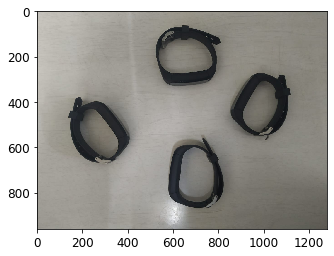

In [9]:
image = cv2.imread("images/wristbands.jpg")
plt.imshow(fixColor(image))

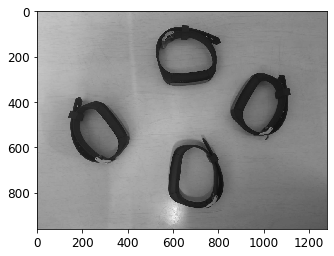

In [10]:
#Convert to Grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(image))


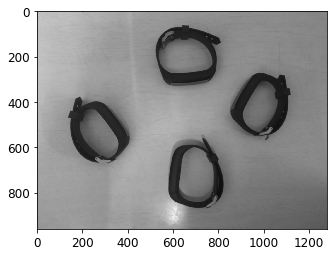

In [4]:
#Run Gaussian blurring
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(fixColor(blurred))

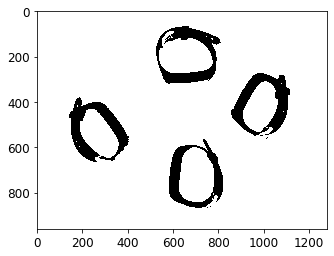

In [11]:
#Apply a threshold of 50
(T, thresh) = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)
plt.imshow(fixColor(thresh))

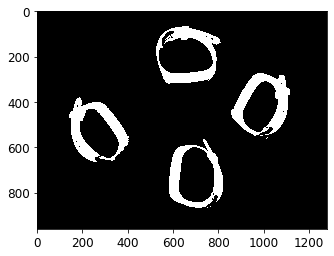

In [6]:
#See the same threshold inverted
(T, threshInv) = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(fixColor(threshInv))

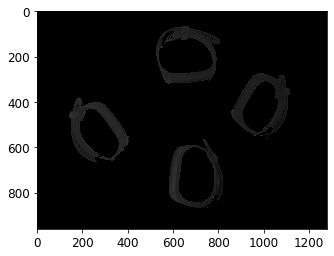

In [7]:
#After applying mask on the original image
plt.imshow(fixColor(cv2.bitwise_and(image, image, mask = threshInv)))

### Other examples of Simple Thresholding

There are other methods of simple thresholding. The difference is largely on how value more or less than the threshold are treated.

For more details check 

![images](images/simple-thresholding-types.png)


We will see the results of them in code below

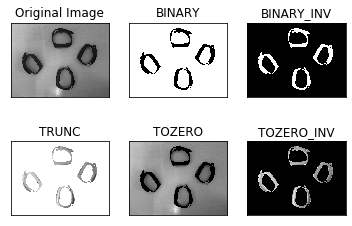

In [8]:
ret,thresh1 = cv2.threshold(image,50,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image,50,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image,50,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image,50,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image,50,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Adaptive Thresholding

The obvious problem with above method it how do you choose the value T. Also at times having a single value for a 
picture may not be a good solution. Welcome Adaptive Thresholding

In [3]:
image = cv2.imread("images/wristbands.jpg")
#image = cv2.imread("images/noise.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

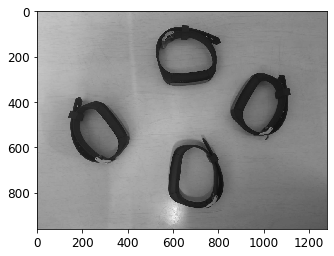

In [4]:
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(fixColor(image))

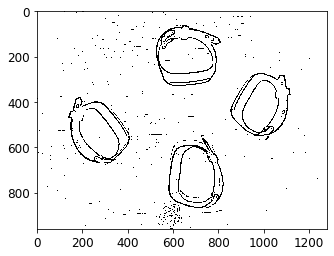

In [5]:
# parameters here are input image, max value, create T using mean of neighbourhood pixels, set min to 0 and max to 255
# 11 is the size of the surroundings and 4 is a constant used for adhjusting results
thresh_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
plt.imshow(fixColor(thresh_mean))


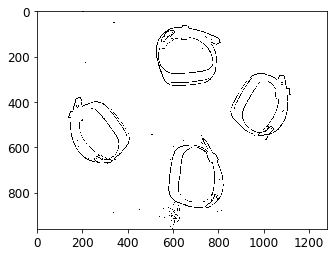

In [6]:
thresh_gauss = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)
plt.imshow(fixColor(thresh_gauss))

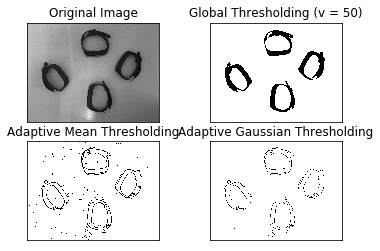

In [12]:
titles = ['Original Image', 'Global Thresholding (v = 50)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, thresh, thresh_mean, thresh_gauss]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu Threshold

Otsu method is type of Global Thresholding, where an algorithm figures out the threshold value. The threshold value will be applied globally. 

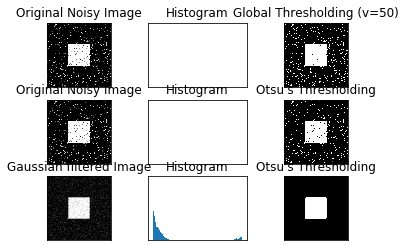

In [16]:
image = cv2.imread("images/noise.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# global thresholding
ret1,th1 = cv2.threshold(image,50,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [image, 0, th1,
          image, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=50)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

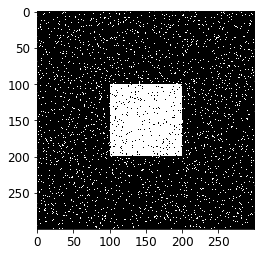

In [17]:
plt.imshow(fixColor(th2))

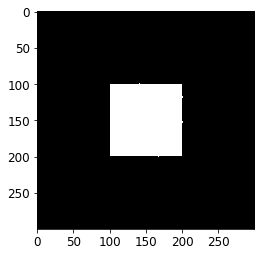

In [18]:
plt.imshow(fixColor(th3))